In [1]:
%matplotlib inline

In [2]:
from __future__ import division
import essentia.standard as ess
import numpy as np
import matplotlib.pyplot as plt

In [3]:
help(ess.MonoLoader)

Help on class Algo in module essentia.standard:

class Algo(Algorithm)
 |  MonoLoader
 |  
 |  
 |  Outputs:
 |  
 |    [vector_real] audio - the audio signal
 |  
 |  
 |  Parameters:
 |  
 |    downmix:
 |      string ∈ {left,right,mix} (default = "mix")
 |      the mixing type for stereo files
 |  
 |    filename:
 |      string
 |      the name of the file from which to read
 |  
 |    sampleRate:
 |      real ∈ (0,inf) (default = 44100)
 |      the desired output sampling rate [Hz]
 |  
 |  
 |  Description:
 |  
 |    Given an audio file this algorithm outputs the raw audio data downmixed to
 |    mono. Audio is resampled in case the given sampling rate does not match the
 |    sampling rate of the input signal.
 |    
 |    This algorithm uses AudioLoader and thus inherits all of its input
 |    requirements and exceptions.
 |  
 |  Method resolution order:
 |      Algo
 |      Algorithm
 |      __builtin__.object
 |  
 |  Methods defined here:
 |  
 |  __call__(self, *args)
 | 

In [4]:
audio = ess.MonoLoader(filename='example.mp3')()

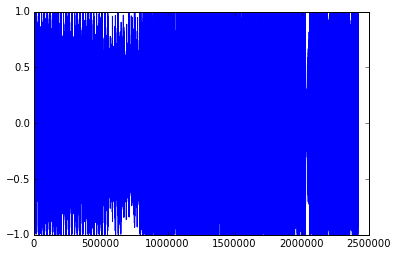

In [5]:
plt.figure()
plt.plot(audio)

In [6]:
help(ess.FrameGenerator)

Help on class FrameGenerator in module essentia.algorithms:

class FrameGenerator(__builtin__.object)
 |  # FrameGenerator
 |  
 |  Methods defined here:
 |  
 |  __init__(self, audio, frameSize=1024, hopSize=512, startFromZero=False, validFrameThresholdRatio=0, lastFrameToEndOfFile=False)
 |  
 |  __iter__(self)
 |  
 |  next(self)
 |  
 |  num_frames(self)
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)
 |  
 |  ----------------------------------------------------------------------
 |  Data and other attributes defined here:
 |  
 |  __struct__ = {'description': 'The FrameGenerator is a special algorith...



In [7]:
help(ess.LoudnessVickers)

Help on class Algo in module essentia.standard:

class Algo(Algorithm)
 |  LoudnessVickers
 |  
 |  
 |  Inputs:
 |  
 |    [vector_real] signal - the input signal
 |  
 |  
 |  Outputs:
 |  
 |    [real] loudness - the Vickers loudness [dB]
 |  
 |  
 |  Parameters:
 |  
 |    sampleRate:
 |      real ∈ [44100,44100] (default = 44100)
 |      the audio sampling rate of the input signal which is used to create the
 |      weight vector [Hz] (currently, this algorithm only works on signals with a
 |      sampling rate of 44100Hz)
 |  
 |  
 |  Description:
 |  
 |    This algorithm computes Vickers's loudness for a given audio signal.
 |    Currently, this algorithm only works for signals with a 44100Hz sampling
 |    rate. This algorithm is meant to be given frames of audio as input (not
 |    entire audio signals). The algorithm described in the paper performs a
 |    weighted average of the loudness value computed for each of the given frames,
 |    this step is left as a post proces

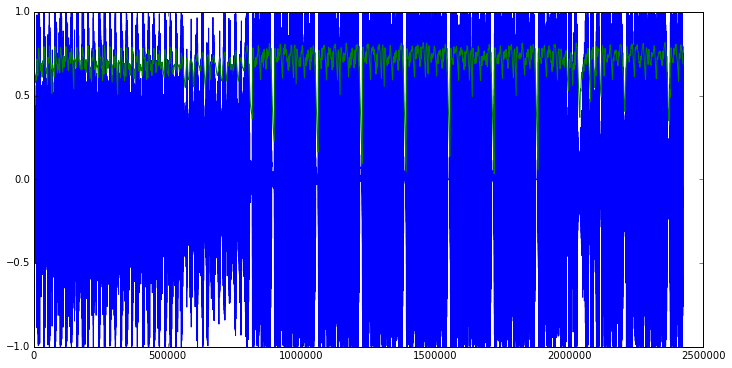

In [21]:
vickers = ess.LoudnessVickers()
dbValues = []
hopSize = 1024
# hopSize and frameSize need to be 1024, simply because those are the
# values we chose in Sonic Visualiser
# frameSize by default is already 1024, that leaves hopSize:
for frame in ess.FrameGenerator(audio, hopSize=hopSize):
    dbValues.append(vickers(frame))

dbValues = np.array(dbValues)

# Let's plot the values.
# Audio sample values are from -1 to +1.
# Vicker's Loudness values are from -100 to 0. We know that simply from
# looking at Sonic Visualiser (of course there's a more mathematical explanation,
# but a look at the scale in Sonic Visualiser is sufficient for now).
#
# Scale the Vicker's Loudness values to a scale from -1 to +1:
scaledValues = ((dbValues + 100) / 100 * 2) - 1

plt.figure(figsize=(12, 6))
plt.plot(audio)
plt.plot(np.arange(len(dbValues))*hopSize, scaledValues)

Looks very much like in Sonic Visualiser, doesn't it?